# IPL outcome Prediction
## The objective of this solution is to create dashboard that visualizes following capabilities and also forecast the future results
1. To find the team that won the most number of matches in the entire IPL.
2. To find the team that lost the most number of matches in the entire IPL.
3. Does winning a toss increase the chances of victory.
4. To find the player with the most player of the match awards.
5. To find the city that hosted the maximum number of IPL matches.
6. To find the most winning team for each season.
7. To find the on-field umpire with the maximum number of IPL matches.
8. To find the biggest victories in IPL while defending a total and while chasing a total.
9. Which team won the most matches while batting first.
10. Which team won the most matches while batting second.
11. List of teams which have won matches by most runs cumulatively


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import xlwt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv('../dataset/matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df.city.replace({"Bangalore":"Bengaluru"}, inplace = True)
df.city.unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [6]:
'''array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)
'''
df.team1.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.team2.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.toss_winner.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
df.winner.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace = True)
# df.team1.unique()
df.team1.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.team2.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.toss_winner.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)
df.winner.replace({"Delhi Capitals":"Delhi Daredevils"},inplace = True)

df.team1.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.team2.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.toss_winner.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)
df.winner.replace({"Deccan Chargers":"Sunrisers Hyderabad"},inplace = True)

In [7]:
df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

### Handling Missing Values

In [8]:
df.city.fillna("unknown")
df.winner.fillna("unknown")
df.umpire3.fillna("unknown")
df.umpire1.fillna("unknown")
df.umpire2.fillna("unknown")
df.result.fillna("unknown")
df.player_of_match.fillna("unknown")

0      Yuvraj Singh
1         SPD Smith
2           CA Lynn
3        GJ Maxwell
4         KM Jadhav
           ...     
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 756, dtype: object

In [9]:
df.to_csv("newdf.csv")

# #1.To find the team that won the most number of matches in the entire IPL.


In [10]:
most_no_of_wins = df.groupby('winner').apply(lambda x: x).reset_index()
most_no_of_wins = most_no_of_wins.groupby('winner').count()
most_no_of_wins = most_no_of_wins.city.reset_index(name='No_Of_Wins')
most_no_of_wins = most_no_of_wins.sort_values(by='No_Of_Wins',ascending=False)
#exporting to xlsx
# most_no_of_wins.to_excel('D:/IPL/output/1_most_wins_by_team.xlsx')

## Plotting

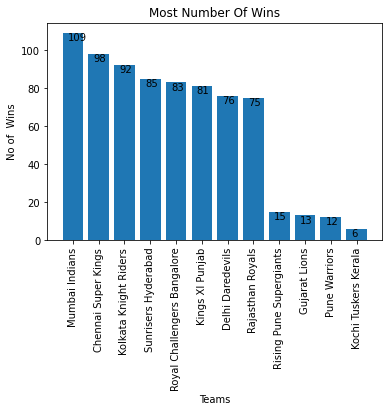

In [10]:
plt.title("Most Number Of Wins")
plt.bar(most_no_of_wins.winner , most_no_of_wins.No_Of_Wins)
plt.xlabel("Teams")
plt.ylabel("No of  Wins")
count = 0
for i in most_no_of_wins.No_Of_Wins:
    plt.text(count-0.2,i-4,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

### 2.To find the team that lost the most number of matches in the entire IPL.

In [19]:
dd = df

In [20]:
# 1. Who played most matches
# 2. Who not in winner
# Kochi Tuskers Kerala Delhi Capitals
test_keys = dd.team1.unique()
lost = {test_keys[i]: 0 for i in range(len(test_keys))}
t1, t2, win = dd.team1, dd.team2, dd['winner']
for t1,t2, win in zip(t1,t2,win):
    if t1 == win:
        lost[t2] += 1
    elif t2 == win:
        lost[t1] += 1
        
team_lost = pd.DataFrame(lost.items(), columns={'Matches Lost', 'Team'})
team_lost.sort_values(['Matches Lost'], axis = 0, ascending = False, inplace = True, na_position ='last')
team_lost.rename(columns={'Matches Lost':'Teams', 'Team':'Matches Lost'}, inplace=True)
team_lost.sort_values(['Matches Lost'], axis = 0, ascending = False, inplace = True, na_position ='last')
team_lost
# export to xlsx
# team_lost.to_excel('../output/2_most_matches_lost.xlsx', sheet_name='matches Lost')

,Matches Lost,Teams
0,Sunrisers Hyderabad,96
4,Royal Challengers Bangalore,93
3,Rising Pune Supergiants,15
9,Rajasthan Royals,70
11,Pune Warriors,33
1,Mumbai Indians,78
5,Kolkata Knight Riders,86
10,Kochi Tuskers Kerala,8
7,Kings XI Punjab,94
2,Gujarat Lions,17


#  Plotting

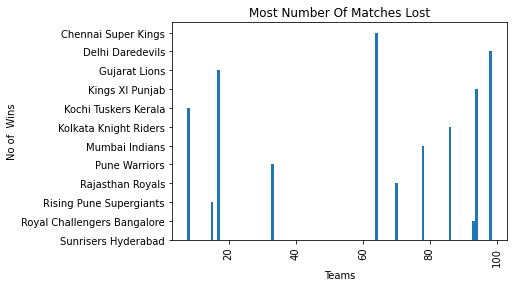

In [21]:
plt.title("Most Number Of Matches Lost")
plt.bar( team_lost['Teams'], team_lost['Matches Lost'])
plt.xlabel("Teams")
plt.ylabel("No of  Wins")

plt.xticks(rotation = 90)
plt.yticks()
plt.show()

### 3.Does winning a toss increase the chances of victory.

In [22]:
dd = df
win_count, team = 0, []
# counting the winner count
for index, value in df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
#         team.append(value['winner'])
        win_count += 1
print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    


The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


In [23]:
test_keys = dd.team1.unique()
winning = {test_keys[i]: 0 for i in range(len(test_keys))}
t1, t2, win, toss_won = dd.team1, dd.team2, dd['winner'], dd['toss_winner']
for t1,t2, win, twin in zip(t1,t2,win, toss_won):
    if t1 == win and t1 == twin:
        winning[t1] += 1
    elif t2 == win and t2 == twin:
        winning[t2] += 1
        
toss_win = pd.DataFrame(lost.items(), columns={'Tosses Won', 'Team'})

In [24]:
# List extracted from matches Won and sorted according to Tosses Won
toss_win.insert(1, "Matches Won", [85,109,13,15, 83,92, 76,81,98,75,6,12], True)

In [25]:
toss_win
# toss_win.to_excel('../output/3.xlsx', sheet_name='matches Lost')

,Tosses Won,Matches Won,Team
0,Sunrisers Hyderabad,85,96
1,Mumbai Indians,109,78
2,Gujarat Lions,13,17
3,Rising Pune Supergiants,15,15
4,Royal Challengers Bangalore,83,93
5,Kolkata Knight Riders,92,86
6,Delhi Daredevils,76,98
7,Kings XI Punjab,81,94
8,Chennai Super Kings,98,64
9,Rajasthan Royals,75,70


## Plotting

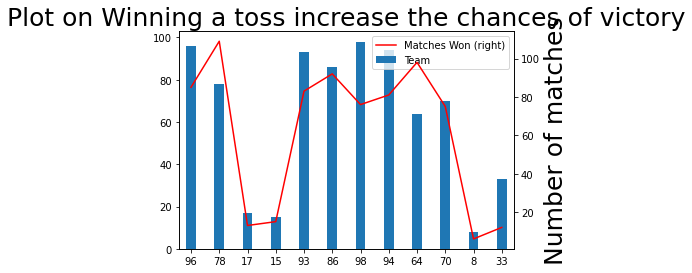

In [26]:
# Team --> x-axis
# Tosees Won --> y-axis
# Matches Won --> line

width = 0.35  # width of bar
axs = toss_win[['Matches Won']].plot(secondary_y=True, color='red')
toss_win[['Team', 'Tosses Won']].plot(kind='bar', width = width,  ax=axs)
# toss_win[['Team', 'Tosses Won']].plot(kind='bar', width = 0.35)
# toss_win[['Matches Won']].plot(secondary_y=True)

ax = plt.gca()
# plt.xlim([-width, len(toss_win['Tosses Won'])-width])
# plt.xticks(rotation=90)
ax.set_xticklabels(tuple(toss_win.Team))
plt.title('Plot on Winning a toss increase the chances of victory', size =25)
plt.xlabel('Team',size =25)
plt.ylabel('Number of matches',size =25)
plt.xticks(rotation=90,size = 15)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)
# plt.xticks( rotation=90)
plt.show()


### 4.To find the player with the most player of the match awards.

In [ ]:
mom = df.groupby('player_of_match').apply(lambda x: x).reset_index()
mom = mom.groupby('player_of_match').count()
mom = mom.city.reset_index(name='No_Of_Awards')
mom = mom.sort_values(by='No_Of_Awards',ascending=False)
mom = mom.head(10)
# exporting to xlsx
# mom.to_excel('../output/4_most_MOM.xlsx', sheet_name='Most Man of Match')

In [ ]:
mom

## Plotting

In [ ]:
plt.title("Most Number Of MOM Awards")
plt.bar(mom.player_of_match , mom.No_Of_Awards)
plt.xlabel("Name")
plt.ylabel("No of  Awards")
count = 0
for i in mom.No_Of_Awards:
    plt.text(count-0.2,i,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

## 5.To find the city that hosted the maximum number of IPL matches.

In [ ]:
city_counts=df.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
req_values = city_counts.sort_values('Match Counts' , ascending = False).reset_index(drop = True)
req_values = req_values[:20]
#exporting to xlsx
# req_values.to_excel('../output/5_most_matches_cities.xlsx', sheet_name='Most City Hosted')

## Plotting

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.title('Venues that hosted the most number of matches', size =30)
plt.xlabel('Venues',size =25)
plt.ylabel('Number of matches',size =25)
plt.xticks(rotation=90,size = 15)
plt.yticks(size = 15)
count = 0
for i in req_values['Match Counts']:
    plt.text(count,i+1,str(i),color='black',size=15)
    count+=1
plt.bar(req_values['city'],req_values['Match Counts'])
plt.show()



## 6.To find the most winning team for each season.

In [ ]:
teams_per_season = df.groupby('season')['winner'].value_counts()
teams_per_season

In [ ]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

In [ ]:
win_per_season_df
# export to xlsx
# win_per_season_df.to_excel('../output/6_winning_team_per_season.xlsx')

## Plotting

In [ ]:
sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired');

## 7.To find the on-field umpire with the maximum number of IPL matches

In [ ]:
u1 = df['umpire1'].value_counts()
u2 = df['umpire2'].value_counts()
ump = pd.concat([u1, u2], axis=1)
umpire_ser = ump.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 
umpire_df.sort_values('matches',ascending=False).head()
# export to xlsx
# umpire_df.to_excel('../output/7_most_umpire_on_field.xlsx')

## Plotting

In [ ]:
# Top 5 umpires 
umpire_df = umpire_df.head()
plt.bar(umpire_df['umpire'], umpire_df['matches'])
plt.title("Most Umpires On Field", fontsize=25)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

### 8.To find the biggest victories in IPL while defending a total and while chasing a total.

###            Defending Victory

In [27]:
# Defending Score
defend_vict_ser = df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
105      1
87       1
42       1
93       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [28]:
score = 146
for index, row in df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [29]:
defending_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in defend_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    defending_vict_df = defending_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
defending_vict_df2 = defending_vict_df.drop([0]) 
# exports
# defending_vict_df2.to_excel('../output/8_defending_vict.xlsx')
defending_vict_df2


,victory_margin,instances
1,14,13
2,4,11
3,10,11
4,1,10
5,9,9
...,...,...
84,66,1
85,64,1
86,59,1
87,62,1


## Plotting

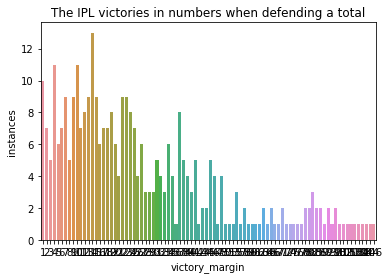

In [30]:
plt.title('The IPL victories in numbers when defending a total')
sns.barplot(x='victory_margin', y='instances', data=defending_vict_df2);
# defend_vict_ser

### Chasing Victory

In [31]:
chasing_vict_ser = df['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

In [32]:
for index, row in df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [33]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
# exports
# chasing_vict_df2.to_excel('../output/8_chasing_vic.xlsx')
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


## Plotting

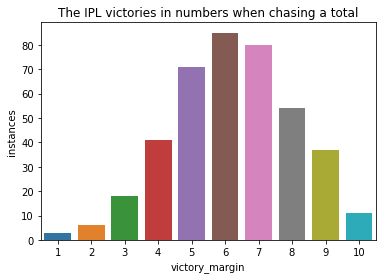

In [34]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

## 9.Which team won the most matches while batting first.

In [ ]:
# Picking up who choosed batting first
bat = df.loc[df['toss_decision'] == 'bat']
# to_drop = ['season', 'city', 'date', 'win_by_runs','result','dl_applied','win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
drop = ['id','team1','team2', 'toss_winner', 'toss_decision', 'winner']  # required columns
bat.drop(bat.columns.difference(drop), 1, inplace=True)
# bat.head()

In [ ]:
bat_first = pd.DataFrame({'Batting First':bat['winner']})
bat_first = bat_first.value_counts()

# Generating Labels and values
bat_labels = [x[0] for x in bat_first.keys()]
bat_values = bat_first.to_list()
# export to xlsx
# bat_first.to_excel('../output/9_won_by_batting_first.xlsx')

## Plotting 

In [ ]:
plt.bar(bat_labels, bat_values)
plt.title("Most Matches won while batting First", fontsize=25)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

## 10.Which team won the most matches while batting second.

In [ ]:
# Picking up who took batting second
field = df.loc[df['toss_decision'] == 'field']
# to_drop = ['season', 'city', 'date', 'win_by_runs','result','dl_applied','win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
drop = ['id','team1','team2', 'toss_winner', 'toss_decision', 'winner']  # required columns
field.drop(field.columns.difference(drop), 1, inplace=True)
# field.head()


In [ ]:
batting_second = pd.DataFrame({'Batting Second': field['winner']})
batting_second = batting_second.value_counts()

# picking up the lables
field_label = [x[0] for x in batting_second.keys()]
field_values = batting_second.to_list()
# export to xlsx
batting_second.to_excel('../output/10_won_by_batting_second.xlsx')
batting_second

## Plotting

In [ ]:
plt.bar(field_label, field_values)
plt.title("Most Matches won while batting Second", fontsize=20)
plt.xticks(rotation = 90, size=15)
plt.yticks(size=15)
plt.show()

### 11. List of teams which have won matches by most runs cumulatively

In [ ]:
mrc = df.sort_values('win_by_runs',ascending = False).reset_index(drop = True)
mrc = mrc[:10]
mrc = mrc[['winner','win_by_runs']]

#export to xlsx
# mrc.to_excel("../output/11_Win_Most_Runs_cumulatively.xlsx")
mrc